# Weddell Sea Strain Parameterization

Import `mixsea` and a few other modules:

In [2]:
import mixsea as mx
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pandas as pd

In [3]:
print(mx.__version__)

0.1.2


#### Read `mixsea` example data

In [4]:
ctd = mx.helpers.read_ctd_testfile()
ladcp = mx.helpers.read_ladcp_testfile()

Our example data contain some NaN values, as is common with observational datasets. Below we isolate the good data by removing NaNs. See the section [Missing Data](#Missing-Data) for using `nan_shearstrain` with input data that contains NaNs.

In [5]:
def nonan(data):
    notnan = [np.isfinite(v) for k, v in data.items()]
    notnan = np.vstack(notnan)
    notnan = np.all(notnan, axis=0)
    return notnan

notnan = nonan(ctd)
depth = ctd["depth"][notnan]
t = ctd["t"][notnan]
SP = ctd["SP"][notnan]
lon = ctd["lon"][0]
lat = ctd["lat"][0]

notnan = nonan(ladcp)
u = ladcp["u"][notnan]
v = ladcp["v"][notnan]
uz = ladcp["uz"][notnan]
vz = ladcp["vz"][notnan]
depth_sh = ladcp["depth"][notnan]

A quick overview plot of the data:

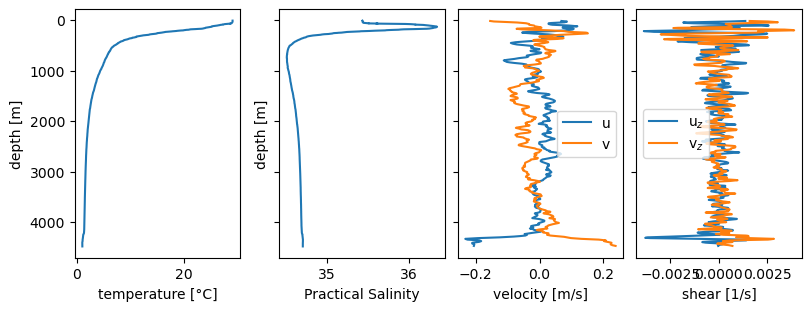

In [6]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(8, 3), constrained_layout=True, sharey=True
)
ax[0].plot(t, depth)
ax[0].set(ylabel="depth [m]", xlabel="temperature [°C]")
ax[1].plot(SP, depth)
ax[1].set(ylabel="depth [m]", xlabel="Practical Salinity")
ax[2].plot(u, depth_sh, label="u")
ax[2].plot(v, depth_sh, label="v")
ax[2].set(xlabel="velocity [m/s]")
ax[2].legend()
ax[3].plot(uz, depth_sh, label=r"u$_{z}$")
ax[3].plot(vz, depth_sh, label=r"v$_{z}$")
ax[3].set(xlabel="shear [1/s]")
ax[3].legend()
ax[0].invert_yaxis()

#### Read example data from the Weddell Sea

In [7]:
WS_ctd = pd.read_csv("WS_ctd.csv")
print(f"WS_ctd contains {WS_ctd.isnull().sum().sum()} NaNs")
WS_ctd = WS_ctd.to_dict(orient = 'list')

WS_ladcp = pd.read_csv("WS_ladcp.csv")
print(f"WS_ladcp contains {WS_ladcp.isnull().sum().sum()} NaNs")
WS_ladcp = WS_ladcp.to_dict(orient = 'list')

WS_ctd contains 0 NaNs
WS_ladcp contains 0 NaNs


In [8]:
WS_depth = WS_ctd["depth"]
WS_t = WS_ctd["t"]
WS_SP = WS_ctd["SP"]
WS_lon = WS_ctd["lon"][0]
WS_lat = WS_ctd["lat"][0]

WS_u = WS_ladcp["u"]
WS_v = WS_ladcp["v"]
WS_uz = WS_ladcp["uz"]
WS_vz = WS_ladcp["vz"]
WS_depth_sh = WS_ladcp["depth"]

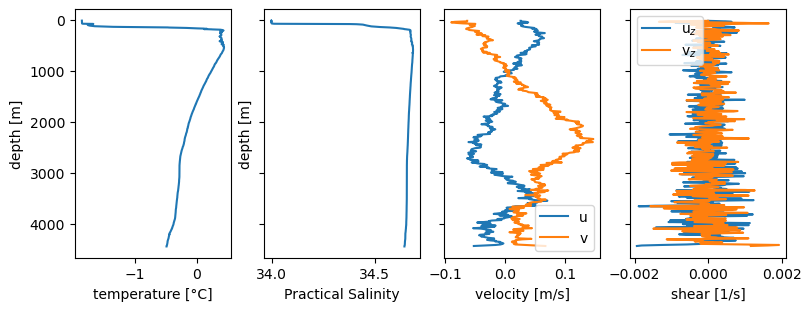

In [9]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(8, 3), constrained_layout=True, sharey=True
)
ax[0].plot(WS_t, WS_depth)
ax[0].set(ylabel="depth [m]", xlabel="temperature [°C]")
ax[1].plot(WS_SP, WS_depth)
ax[1].set(ylabel="depth [m]", xlabel="Practical Salinity")
ax[2].plot(WS_u, WS_depth_sh, label="u")
ax[2].plot(WS_v, WS_depth_sh, label="v")
ax[2].set(xlabel="velocity [m/s]")
ax[2].legend()
ax[3].plot(WS_uz, WS_depth_sh, label=r"u$_{z}$")
ax[3].plot(WS_vz, WS_depth_sh, label=r"v$_{z}$")
ax[3].set(xlabel="shear [1/s]")
ax[3].legend()
ax[0].invert_yaxis()

#### Comparison

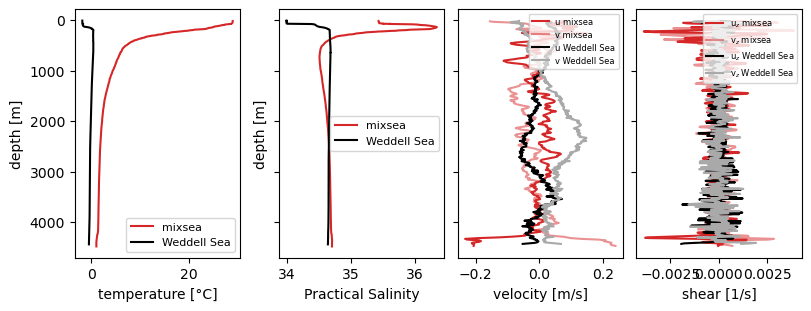

In [10]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(8, 3), constrained_layout=True, sharey=True
)

ax[0].plot(t, depth, label = "mixsea", c = "tab:red")
ax[1].plot(SP, depth, label = "mixsea", c = "tab:red")
ax[2].plot(u, depth_sh, label="u mixsea", c = "tab:red")
ax[2].plot(v, depth_sh, label="v mixsea", c = "tab:red", alpha = 0.5)
ax[3].plot(uz, depth_sh, label=r"u$_{z}$ mixsea", c = "tab:red")
ax[3].plot(vz, depth_sh, label=r"v$_{z}$ mixsea", c = "tab:red", alpha = 0.5)

ax[0].plot(WS_t, WS_depth, label = "Weddell Sea", c = "k")
ax[1].plot(WS_SP, WS_depth, label = "Weddell Sea", c = "k")
ax[2].plot(WS_u, WS_depth_sh, label="u Weddell Sea", c = "k")
ax[2].plot(WS_v, WS_depth_sh, label="v Weddell Sea", c = "darkgrey")
ax[3].plot(WS_uz, WS_depth_sh, label=r"u$_{z}$ Weddell Sea", c = "k")
ax[3].plot(WS_vz, WS_depth_sh, label=r"v$_{z}$ Weddell Sea", c = "darkgrey")

ax[0].set(ylabel="depth [m]", xlabel="temperature [°C]")
ax[1].set(ylabel="depth [m]", xlabel="Practical Salinity")
ax[2].set(xlabel="velocity [m/s]")
ax[3].set(xlabel="shear [1/s]")

ax[0].legend(fontsize="8")
ax[1].legend(fontsize="8")
ax[2].legend(fontsize="6")
ax[3].legend(fontsize="6")
ax[0].invert_yaxis()

In [11]:
print("Comparison of Vertical resolution:")
print(" mixsea example data:")
print(f"\tctd = {np.mean(np.diff(depth))} m")
print(f"\tladcp = {np.mean(np.diff(depth_sh))} m")
print(" Weddell Sea example data:")
print(f"\tctd = {np.mean(np.diff(WS_depth)):.1f} m")
print(f"\tladcp = {np.mean(np.diff(WS_depth_sh))} m")   

print("Comparison of Vertical resolution:")
print(" mixsea example data:")
print(f"\tctd = {np.mean(np.diff(depth))} m")
print(f"\tladcp = {np.mean(np.diff(depth_sh))} m")
print(" Weddell Sea example data:")
print(f"\tctd = {np.mean(np.diff(WS_depth)):.1f} m")
print(f"\tladcp = {np.mean(np.diff(WS_depth_sh))} m")

Comparison of Vertical resolution:
 mixsea example data:
	ctd = 1.0 m
	ladcp = 5.0 m
 Weddell Sea example data:
	ctd = 1.0 m
	ladcp = 10.0 m
Comparison of Vertical resolution:
 mixsea example data:
	ctd = 1.0 m
	ladcp = 5.0 m
 Weddell Sea example data:
	ctd = 1.0 m
	ladcp = 10.0 m


## Example of the shear/strain internal wave parameterization

We begin by choosing our parameters. The key parameter choices are:

- `window_size`: the vertical extent of the spectral windows used to estimate shear/strain spectra;
- `min_size`: the shortest vertical wavelength resolved by the data (should be a factor of `window_size`); doesn't matter much in practice because we separately constrain the spectral windows with the two following parameters.
- `mi_sh`: index limits for integrating shear variance (excluding upper limit, following Python convention). Lower bound is generally just set to 0 so that the gravest mode included is the `window_size`; upper bound is generally set to 100-150 m.
- `mi_st`: index limits for integrating strain variance (excluding upper limit, following Python convention). Lower bound is generally set to 100-150 m and upper bound set to 10-20 m. In practice, the integration is often cut-off well before 10 m.

In [12]:
shst_params = dict()

# Center points of depth windows. Windows are half overlapping, i.e.
# their size (300m) is double the spacing here (150m).
window_size = 300.0
min_size = 10.0
dz = window_size / 2
shst_params["depth_bin"] = np.arange(dz, 10000.0, dz)
shst_params["window_size"] = window_size

# Set up wavenumber vector.
shst_params["m"] = np.arange(
    2 * np.pi / window_size, 2 * np.pi / min_size, 2 * np.pi / window_size
)

# Set up limits for shear and strain variance integrations
mi_sh = np.array([0, 3])
mii_sh = np.array(range(*mi_sh))
mi_st = np.array([2, 20])
mii_st = np.array(range(*mi_st))

shst_params["m_include_sh"] = mii_sh
shst_params["m_include_st"] = mii_st

# Convert indices to more intuitive length scales
m_sh = 2 * np.pi / shst_params["m"][[mi_sh[0], mi_sh[1] - 1]]
m_st = 2 * np.pi / shst_params["m"][[mi_st[0], mi_st[1] - 1]]
print(
    f"Wavenumber indices for integration:\n"
    f"- Shear is integrated from {round(m_sh[0])}m to {round(m_sh[1])}m scales.\n"
    f"- Strain is integrated from {round(m_st[0])}m to {round(m_st[1])}m."
)

shst_params["ladcp_is_shear"] = True
shst_params["return_diagnostics"] = True

Wavenumber indices for integration:
- Shear is integrated from 300m to 100m scales.
- Strain is integrated from 100m to 15m.


We now pass our input data and parameter dictionary to the `shearstrain` function and retrieve the dissipation rate of turbulent kinetic energy $\epsilon$, the diapycnal diffusivity $\kappa_{\rho}$, and an optional dictionary of detailed diagnostics.

In [13]:
# Methods works for the mixsea example data
eps, krho, diag = mx.shearstrain.shearstrain(
    depth, t, SP, lon, lat, uz, vz, depth_sh, **shst_params
)
print(eps)

[2.05286443e-09 3.67135341e-09 3.31418057e-10 3.64383934e-10
 2.04203623e-10 1.72196312e-10 1.73526295e-10 3.70054191e-10
 6.80152637e-11 1.60900113e-10 9.46499956e-11 9.04860056e-11
 1.02429235e-10 1.53120405e-10 2.34487181e-10 1.34714211e-10
 1.29505366e-10 7.09336602e-11 2.47799155e-11 1.15959302e-10
 4.50715865e-11 1.56593307e-11 7.46738676e-11 2.88496761e-11
 7.15995543e-11 7.03484579e-11 3.49038555e-11 3.17738152e-09
 8.05920295e-09]


In [14]:
# But not for the Weddell Sea
eps, krho, diag = mx.shearstrain.shearstrain(
    WS_depth, WS_t, WS_SP, WS_lon, WS_lat, WS_uz, WS_vz, WS_depth_sh, **shst_params
)
print(eps)

[1.11585364e-11 4.67919192e-11 2.95870649e-11 3.04148248e-11
 1.65992935e-11 4.91509063e-12 1.57502492e-11 1.22348498e-11
 4.37945028e-11 8.32889042e-12 7.07510249e-12 6.25877849e-12
 3.03814918e-11 1.09157610e-10 3.27104489e-11 3.64127112e-11
 2.75452595e-11 4.40225348e-12 1.22046394e-11 2.77894002e-11
 4.65052494e-11 2.62183311e-11 9.21878552e-11 1.00564118e-10
 4.48850071e-11 7.02492180e-11 4.87943735e-11 4.16081827e-11
 1.95826232e-10]


Let's visualize the vertical profiles of the estimated mixing rates due to internal waves:

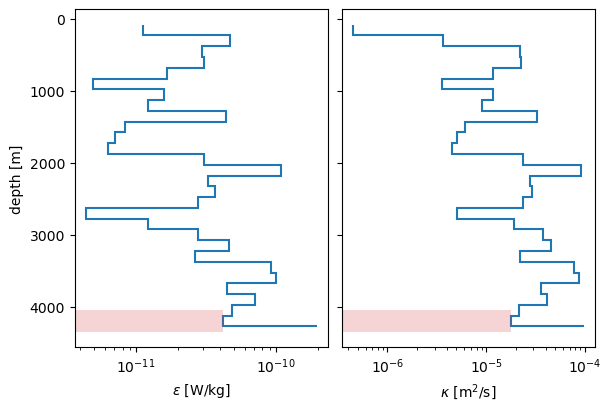

In [15]:
depth_bin = diag["depth_bin"]
depth_bin_edges = np.concatenate(
    (
        [np.min(depth_bin) - dz / 2],
        0.5 * (depth_bin[1:] + depth_bin[:-1]),
        [np.max(depth_bin) - dz / 2],
    )
)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 4), sharey=True, constrained_layout=True)
ax[0].stairs(eps, depth_bin_edges, orientation="horizontal", baseline=None, lw=1.5)
ax[0].set(xscale="log", xlabel=r"$\epsilon$ [W/kg]", ylabel="depth [m]")
ax[0].invert_yaxis()

ax[1].stairs(krho, depth_bin_edges, orientation="horizontal", baseline=None, lw=1.5)
ax[1].set(xscale="log", xlabel=r"$\kappa$ [m$^{2}$/s]")

k = -2
ax[0].fill_betweenx(
    np.array([-dz, dz]) + depth_bin[k],
    [0, 0],
    [eps[k], eps[k]],
    facecolor="C3",
    alpha=0.2,
)
ax[1].fill_betweenx(
    np.array([-dz, dz]) + depth_bin[k],
    [0, 0],
    [krho[k], krho[k]],
    facecolor="C3",
    alpha=0.2,
);

#### Deep dive for a single high-dissipation window near the bottom

Let's zoom in on the second to last window (shaded in red above), which exhibits abnormally strong strain variance and thus corresponds to a large dissipation rate, to get a better understanding of what the shear/strain variance and strain variance algorithms are doing.

Shear variance levels are 3.1 times higher than
the GM spectrum over the low wavenumber band.


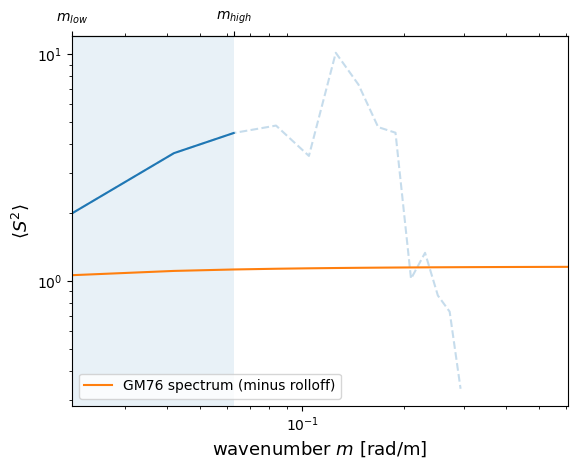

In [16]:
ax = plt.subplot()
plt.loglog(diag["m"][mii_sh], diag["P_shear"][k][mii_sh])
plt.loglog(diag["m"], diag["P_shear"][k], "C0--", alpha=0.25)
S_shear_gm, P_shear_gm = mx.shearstrain.gm_shear_variance(
    diag["m"], mii_sh, diag["Nmseg"][k]
)
plt.loglog(diag["m"], P_shear_gm, label="GM76 spectrum (minus rolloff)")
ylims = plt.gca().get_ylim()
plt.fill_between(
    diag["m"][[mi_sh[0], mi_sh[1] - 1]],
    [ylims[0], ylims[0]],
    [ylims[1], ylims[1]],
    alpha=0.1,
)
plt.ylim(ylims)
plt.xlim(diag["m"][0], diag["m"][-1])
plt.ylabel(r"$\langle S^{2} \rangle$", fontsize=13)
plt.xlabel(r"wavenumber $m$ [rad/m]", fontsize=13)
plt.legend()


def same(x):
    return x


secax = ax.secondary_xaxis("top", functions=(same, same))
secax.set_xticks([diag["m"][mii_sh[0]], diag["m"][mii_sh[-1]]], minor=False)
secax.set_xticklabels([r"$m_{low}$", r"$m_{high}$"])

var_ratio = diag["Int_sh"][k] / diag["Int_sh_gm"][k]
print(
    f"Shear variance levels are {round(var_ratio,1)} times higher than\n"
    f"the GM spectrum over the low wavenumber band."
)

Strain variance levels are 0.9 times higher than
the GM spectrum over the low wavenumber band.


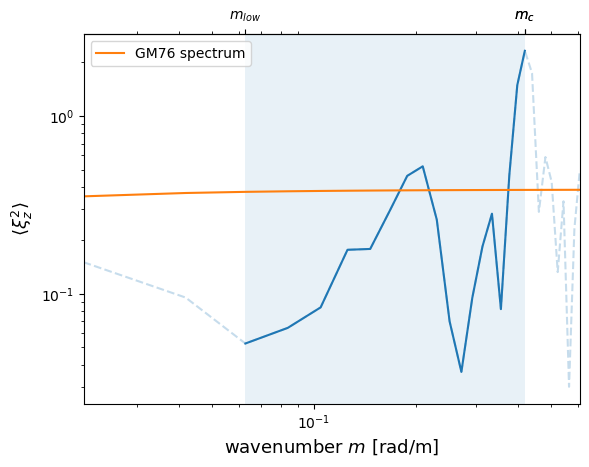

In [17]:
ax = plt.subplot()
plt.loglog(diag["m"][mii_st], diag["P_strain"][k][mii_st])
plt.loglog(diag["m"], diag["P_strain"][k], "C0--", alpha=0.25)
S_strain_gm, P_strain_gm = mx.shearstrain.gm_strain_variance(
    diag["m"], mii_st, diag["Nmseg"][k]
)
plt.loglog(diag["m"], P_strain_gm, label="GM76 spectrum")
mii_st_cutoff = mii_st[diag["m"][mii_st] <= diag["Mmax_st"][k]]
S_strain_gm, P_strain_gm = mx.shearstrain.gm_strain_variance(
    diag["m"], mii_st_cutoff, diag["Nmseg"][k]
)
ylims = plt.gca().get_ylim()
plt.fill_between(
    [diag["m"][mii_st_cutoff[0]], diag["Mmax_st"][k]],
    [ylims[0], ylims[0]],
    [ylims[1], ylims[1]],
    alpha=0.1,
)
plt.ylim(ylims)
plt.xlim(diag["m"][0], diag["m"][-1])
plt.ylabel(r"$\langle \xi_{z}^{2} \rangle$", fontsize=13)
plt.xlabel(r"wavenumber $m$ [rad/m]", fontsize=13)
plt.legend()

secax = ax.secondary_xaxis("top", functions=(same, same))
secax.set_xticks(
    [diag["m"][mii_st[0]], diag["m"][mii_st[-1]], diag["Mmax_st"][k]], minor=False
)
secax.set_xticklabels([r"$m_{low}$", r"$m_{high}$", r"$m_{c}$"])

print(
    rf"Strain variance levels are {round(diag['Int_st'][k]/S_strain_gm,1)} times "
    f"higher than\nthe GM spectrum over the low wavenumber band."
)

In this example, since the strain variance is much larger than GM levels while the shear variance is only slightly large than GM levels, the shear/strain ratio drops well below the GM level of $R_{\omega}$=3. Since shear/strain ratios of less than $1$ are unphysical for internal waves (for example the aspect ratio correction terms contain a factor $\sqrt{R_{\omega} - 1}$), we set any $R_{\omega} \leq 1$ to $R_{\omega}=1.01$.

In [18]:
print(
    f"Raw shear/strain ratio: {round(diag['Rwtot'][k], 2)}, "
    f"corrected ratio: {diag['Rwcor'][k]:.2f}"
)

Raw shear/strain ratio: 10.29, corrected ratio: 10.29


#### Decomposing the terms of the parameterization

The dissipation rate for the shear/strain parameterization is given as:
\begin{equation}
\epsilon_{\text{fine}} = \epsilon_{0} \; \frac{\overline{N}^{2}}{N_{0}^{2}} \; \frac{\langle S^{2} \rangle}{\langle S^{2}_{\text{GM}} \rangle} \; h_{1}(R_{\omega}) \; L(f, \overline{N})
\end{equation}

It is useful to plot their vertical profiles to get a sense of how their various dependencies combine to produce a typical dissipation rate profile, where the grey dashed lines denote the reference values for the GM spectrum.

Verification successful: True


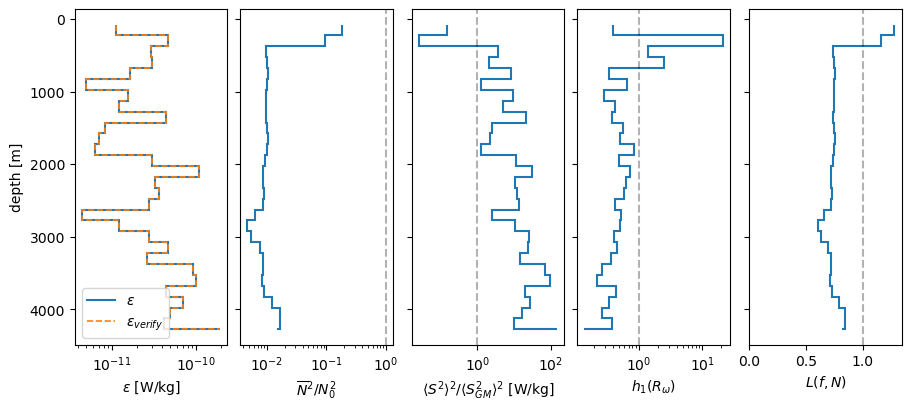

In [19]:
N0 = 5.24e-3
f = np.absolute(gsw.f(WS_ctd["lat"][0])) #Here the Weddell Sea data is explixitly used

fig, ax = plt.subplots(
    nrows=1, ncols=5, figsize=(9, 4), sharey=True, constrained_layout=True
)
ax[0].stairs(
    eps,
    depth_bin_edges,
    label=r"$\epsilon$",
    orientation="horizontal",
    baseline=None,
    lw=1.5,
)
ax[0].set(xscale="log", xlabel=r"$\epsilon$ [W/kg]", ylabel="depth [m]")
ax[0].invert_yaxis()

ax[1].axvline(1.0, color="k", alpha=0.3, ls="--")
ax[1].stairs(
    diag["Nmseg"] ** 2 / N0 ** 2,
    depth_bin_edges,
    orientation="horizontal",
    baseline=None,
    lw=1.5,
)
ax[1].set(xscale="log", xlabel=r"$\overline{N}^{2}/N_{0}^{2}$")

ax[2].axvline(1.0, color="k", alpha=0.3, ls="--")
ax[2].stairs(
    diag["Int_sh"] ** 2 / diag["Int_sh_gm"] ** 2,
    depth_bin_edges,
    orientation="horizontal",
    baseline=None,
    lw=1.5,
)
ax[2].set(
    xscale="log",
    xlabel=r"$\langle S^{2} \rangle^{2} / \langle S^{2}_{GM} \rangle^{2}$ [W/kg]",
)

ax[3].axvline(
    mx.shearstrain.aspect_ratio_correction_shst(3.0), color="k", alpha=0.3, ls="--"
)
ax[3].stairs(
    mx.shearstrain.aspect_ratio_correction_shst(diag["Rwcor"]),
    depth_bin_edges,
    orientation="horizontal",
    baseline=None,
    lw=1.5,
)
ax[3].set(xscale="log", xlabel=r"$h_{1}(R_{\omega})$")

ax[4].axvline(1.0, color="k", alpha=0.3, ls="--")
ax[4].stairs(
    mx.shearstrain.latitude_correction(f, diag["Nmseg"]),
    depth_bin_edges,
    orientation="horizontal",
    baseline=None,
    lw=1.5,
)
ax[4].set(xlabel=r"$L(f, N)$")

eps0 = 7.8e-10
eps_verify = (
    eps0
    * diag["Nmseg"] ** 2
    / N0 ** 2
    * diag["Int_sh"] ** 2
    / diag["Int_sh_gm"] ** 2
    * mx.shearstrain.aspect_ratio_correction_shst(diag["Rwcor"])
    * mx.shearstrain.latitude_correction(f, diag["Nmseg"])
)
ax[0].stairs(
    eps_verify,
    depth_bin_edges,
    label=r"$\epsilon_{verify}$",
    orientation="horizontal",
    baseline=None,
    lw=1.2,
    ls="--",
    alpha=1.0,
)
ax[0].legend()

print(f"Verification successful: {np.isclose(eps_verify, eps).all()}")

Verification successful: True


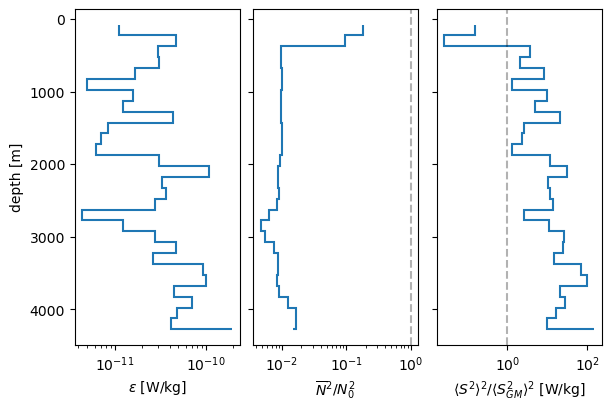

In [21]:
N0 = 5.24e-3
f = np.absolute(gsw.f(WS_ctd["lat"][0])) #Here the Weddell Sea data is explixitly used

fig, ax = plt.subplots(
    nrows=1, ncols=3, figsize=(6, 4), sharey=True, constrained_layout=True
)
ax[0].stairs(
    eps,
    depth_bin_edges,
    label=r"$\epsilon$",
    orientation="horizontal",
    baseline=None,
    lw=1.5,
)
ax[0].set(xscale="log", xlabel=r"$\epsilon$ [W/kg]", ylabel="depth [m]")
ax[0].invert_yaxis()

ax[1].axvline(1.0, color="k", alpha=0.3, ls="--")
ax[1].stairs(
    diag["Nmseg"] ** 2 / N0 ** 2,
    depth_bin_edges,
    orientation="horizontal",
    baseline=None,
    lw=1.5,
)
ax[1].set(xscale="log", xlabel=r"$\overline{N}^{2}/N_{0}^{2}$")

ax[2].axvline(1.0, color="k", alpha=0.3, ls="--")
ax[2].stairs(
    diag["Int_sh"] ** 2 / diag["Int_sh_gm"] ** 2,
    depth_bin_edges,
    orientation="horizontal",
    baseline=None,
    lw=1.5,
)
ax[2].set(
    xscale="log",
    xlabel=r"$\langle S^{2} \rangle^{2} / \langle S^{2}_{GM} \rangle^{2}$ [W/kg]",
)
print(f"Verification successful: {np.isclose(eps_verify, eps).all()}")

## Stratification Smoothing Techniques

`shearstrain` allows to select between two different techniques for obtaining a smooth profile of $N^2$. Adiabatic leveling is the default (used in the example above).

**Adiabatic Leveling** finds locally stable density gradients to calculate a smooth $N^2$ profile following Bray & Fofonoff (1981), see e.g. Polzin et al. (2014), Waterman et al. (2013, 2014).

**Polynomial Fitting** applies a second order polynomial fit to $N^2$ for each segment to obtain a smooth profile, compare e.g. Kunze et al. (2006), Whalen et al. (2012, 2015).

Run the shear/strain parameterization for both the techniques:

In [19]:
# leads to results for the mixsea example data
eps_PF, krho_PF, diag_PF = mx.shearstrain.shearstrain(
    depth, t, SP, lon, lat, uz, vz, depth_sh, smooth="PF", **shst_params
)
print(eps_PF)

[3.31438644e-08 3.78077655e-09 4.47372882e-10 4.01663679e-10
 2.04463806e-10 1.66611248e-10 1.94149286e-10 1.69079569e-10
 6.49240773e-11 1.60457135e-10 1.00709032e-10 8.87395160e-11
 1.29506617e-10 1.73916875e-10 2.53069316e-10 1.33671530e-10
 1.32637083e-10 7.17785166e-11 2.45480823e-11 1.01966733e-10
 5.04104114e-11 1.50544969e-11 8.02657203e-11 2.71714074e-11
 8.06134322e-11 7.38463655e-11 3.81549237e-11 2.96490411e-09
 6.25782235e-09]


In [20]:
eps_PF, krho_PF, diag_PF = mx.shearstrain.shearstrain(
    WS_depth, WS_t, WS_SP, WS_lon, WS_lat, WS_uz, WS_vz, WS_depth_sh, smooth="PF", **shst_params
)
print(eps_PF)

[2.89764014e-10 4.10181878e-12 2.77680179e-11 2.84809418e-11
 1.74659367e-11 4.76269675e-12 1.55142453e-11 1.21159449e-11
 4.22719594e-11 8.11714062e-12 6.97704943e-12 6.34290415e-12
 3.19664056e-11 1.02210123e-10 3.35624469e-11 3.13044461e-11
 2.90135004e-11 4.56493914e-12 1.25114517e-11 2.68406486e-11
 4.58686270e-11 2.64827432e-11 8.85322365e-11 1.01309131e-10
 4.45187491e-11 6.86894225e-11 4.76058269e-11 4.43436282e-11
 3.97126202e-10]


Compare results from the two techniques:

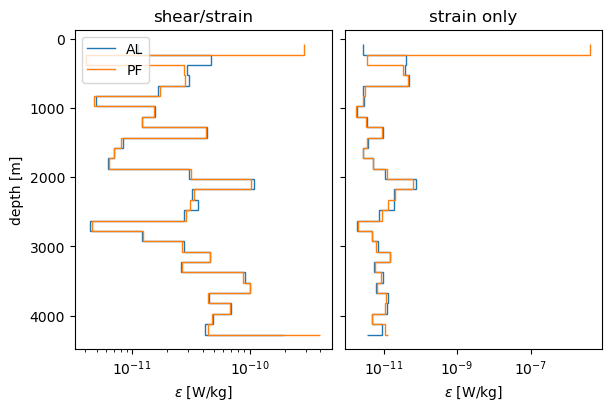

In [21]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(6, 4), constrained_layout=True, sharey=True
)
opts = dict(orientation="horizontal", baseline=None)

# shear/strain
ax[0].stairs(eps, depth_bin_edges, label="AL", **opts)
ax[0].stairs(eps_PF, depth_bin_edges, label="PF", **opts)
ax[0].legend(loc="upper left")
ax[0].set(
    xscale="log", xlabel=r"$\epsilon$ [W/kg]", ylabel="depth [m]", title="shear/strain"
)
ax[0].invert_yaxis()

# strain only
ax[1].stairs(diag["eps_st"], depth_bin_edges, label="AL", **opts)
ax[1].stairs(diag_PF["eps_st"], depth_bin_edges, label="PF", **opts)
ax[1].set(xscale="log", xlabel=r"$\epsilon$ [W/kg]", title="strain only");

Results differ mostly for the upper ocean and the bottom layer. Note that we do not filter out parts of the profile where the shear/strain parameterization may not apply as underlying assumptions are violated, i.e. near the surface mixed layer and in the lowly stratified layer of the abyssal flow through the Samoan Passage.

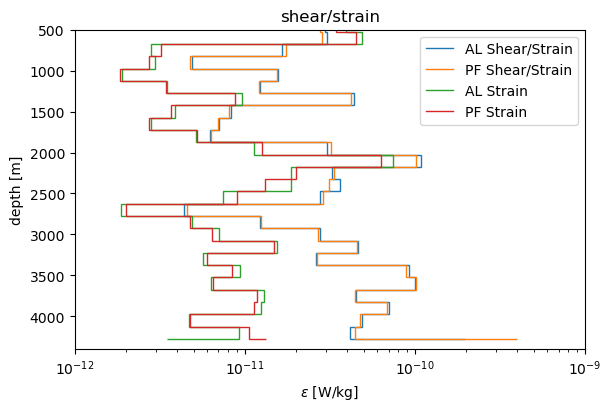

In [31]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(6, 4), constrained_layout=True, sharey=True
)
opts = dict(orientation="horizontal", baseline=None)

# shear/strain
ax.stairs(eps, depth_bin_edges, label="AL Shear/Strain", **opts)
ax.stairs(eps_PF, depth_bin_edges, label="PF Shear/Strain", **opts)
# strain only
ax.stairs(diag["eps_st"], depth_bin_edges, label="AL Strain", **opts)
ax.stairs(diag_PF["eps_st"], depth_bin_edges, label="PF Strain", **opts)

ax.set(
    xscale="log", xlabel=r"$\epsilon$ [W/kg]", ylabel="depth [m]", title="shear/strain"
)
ax.set_ylim(500,4400)
ax.set_xlim(1e-12,1e-9)
ax.invert_yaxis()

ax.legend(loc="upper right");